In [1]:
cd drive/MyDrive/MeshClassification/

/content/drive/MyDrive/MeshClassification


In [2]:
!pip install trimesh

     |████████████████████████████████| 634kB 8.2MB/s 


In [3]:
from data_preprocess.extract_features import extract_features
from data_preprocess.data_reader import tfrecord_to_dataset

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [9]:
NUM_EDGES = 750
NUM_FEATURES = 5

In [6]:
train_features, train_labels = tfrecord_to_dataset('./dataset/encoded_data/train.tfrecord')
train_features = extract_features(train_features, NUM_EDGES)

In [7]:
val_features, val_labels = tfrecord_to_dataset('./dataset/encoded_data/test.tfrecord')
val_features = extract_features(val_features, NUM_EDGES)

In [14]:
TRAIN_DATA_SIZE = train_features.shape[0]
VAL_DATA_SIZE = val_features.shape[0]

In [15]:
train_features = np.reshape(train_features,(-1, NUM_EDGES, NUM_FEATURES,1))
val_features = np.reshape(val_features,(-1, NUM_EDGES, NUM_FEATURES,1))

In [16]:
train_features.shape, train_labels.shape, val_features.shape, val_labels.shape

((40, 750, 5, 1), (40,), (16, 750, 5, 1), (16,))

In [17]:
shuffled_train = np.arange(TRAIN_DATA_SIZE)
shuffled_val = np.arange(VAL_DATA_SIZE)

In [18]:
np.random.shuffle(shuffled_train)
np.random.shuffle(shuffled_val)

In [44]:
model = Sequential()

In [45]:
shape = (NUM_EDGES, NUM_FEATURES, 1)

In [46]:
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(5,1)))
model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,5)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 750, 5, 32)        320       
_________________________________________________________________
batch_normalization_12 (Batc (None, 750, 5, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 150, 5, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 150, 5, 64)        18496     
_________________________________________________________________
activation_12 (Activation)   (None, 150, 5, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 1, 64)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 75, 1, 64)        

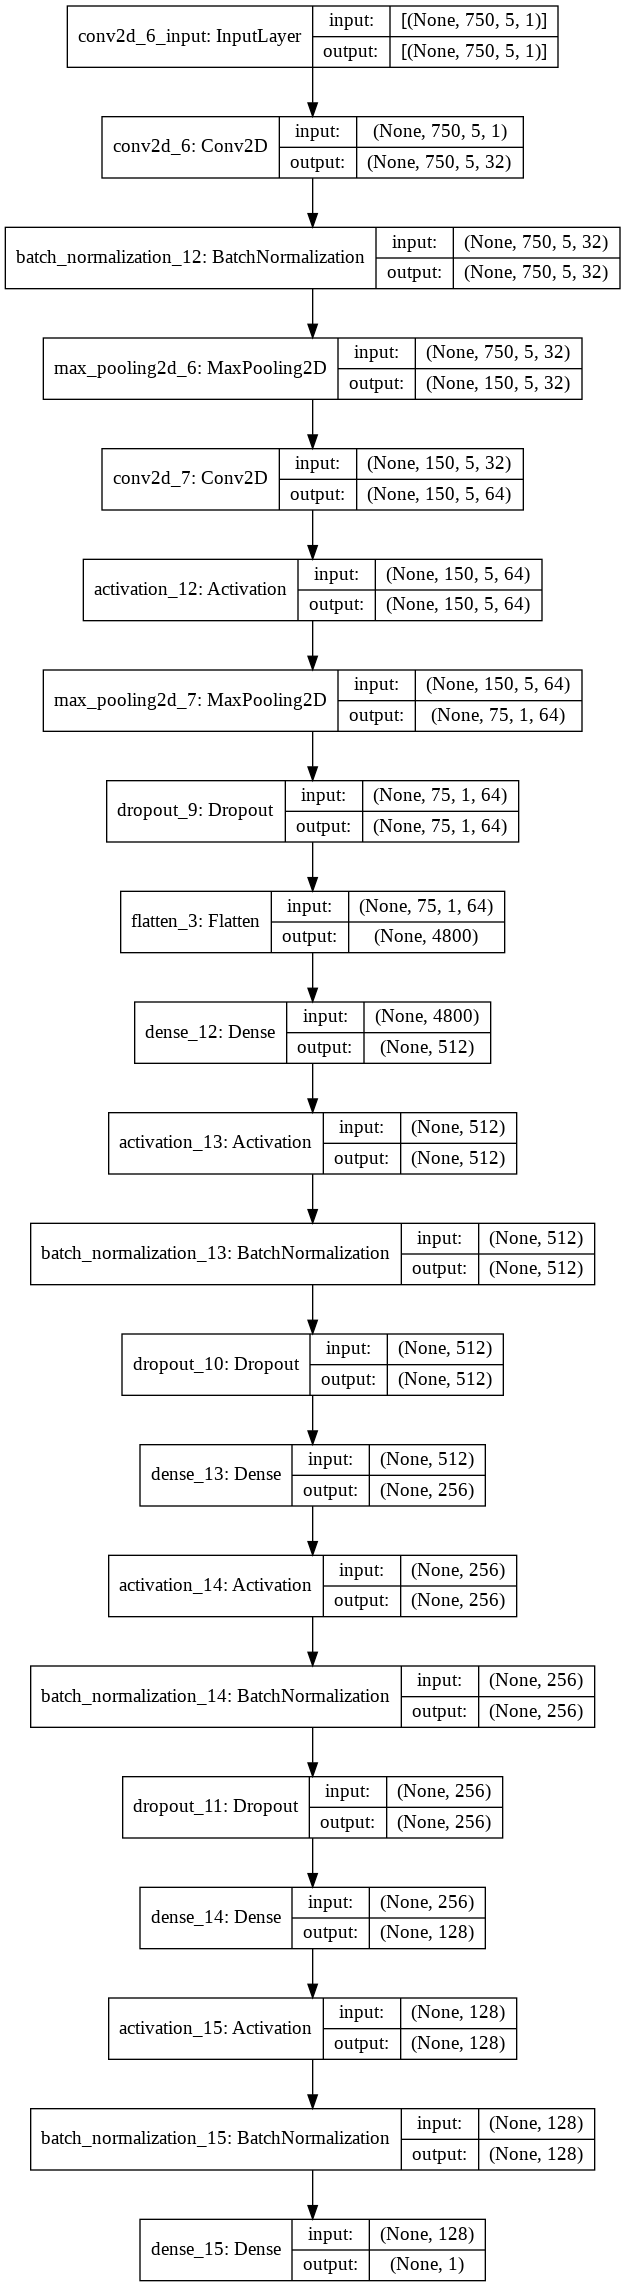

In [54]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [47]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=["acc"])

In [19]:
def data_generator(mesh_features, labels, arr, batch_size):
  while 1:
    start = 0
    end = batch_size
    while start  < len(arr): 
      yield (mesh_features[arr[start:end]], labels[arr[start:end]])
      start += batch_size
      end += batch_size

In [49]:
train_data_generator = data_generator(train_features, train_labels, shuffled_train, TRAIN_DATA_SIZE)
val_data_generator = data_generator(val_features, val_labels, shuffled_val, VAL_DATA_SIZE)

In [48]:
epochs = 20

In [50]:
history = model.fit_generator(
    train_data_generator,
    epochs=epochs,
    steps_per_epoch= 200,
    verbose=1,
    validation_data=val_data_generator,
    validation_steps= 1
)
model.save('model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
200/200 [==============================] - 3s 10ms/step - loss: 0.0252 - acc: 0.9887 - val_loss: 17.3349 - val_acc: 0.5000
Epoch 2/20
200/200 [==============================] - 2s 9ms/step - loss: 0.0028 - acc: 0.9989 - val_loss: 16.5988 - val_acc: 0.5000
Epoch 3/20
200/200 [==============================] - 2s 8ms/step - loss: 3.8747e-05 - acc: 1.0000 - val_loss: 0.2848 - val_acc: 0.9375
Epoch 4/20
200/200 [==============================] - 2s 8ms/step - loss: 1.6271e-05 - acc: 1.0000 - val_loss: 0.0772 - val_acc: 0.9375
Epoch 5/20
200/200 [==============================] - 2s 9ms/step - loss: 3.9047e-05 - acc: 1.0000 - val_loss: 0.4607 - val_acc: 0.8750
Epoch 6/20
200/200 [==============================] - 2s 9ms/step - loss: 2.0838e-05 - acc: 1.0000 - val_loss: 0.0651 - val_acc: 0.9375
Epoch 7/20
200/200 [==============================] - 2s 8ms/step - loss: 6.6170e-06 - acc: 1.0000 - val_loss: 0.0973 - val_acc: 0.9375
Epoch 8/20
200/200 [==============================] -

In [55]:
filename = 'model.h5'
model = load_model(filename)

In [ ]:
from

In [60]:
test_example = val_features[15]
y = model.predict(np.reshape(test_example,(1, 750, 5, 1)))
result = np.round(y).item()
if (result == 1):
  print("Object is a sphere.")
else:
  print("Object is a cube.")

Object is a sphere.
